## 1. Import the libraries and the Kaggle dataset "Stroke Risk Prediction Dataset based on Literature"

In [8]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahatiratusher/stroke-risk-prediction-dataset-v2")

print("Path to dataset files:", path)

100%|██████████| 240k/240k [00:00<00:00, 2.83MB/s]

Extracting files...
Path to dataset files: C:\Users\Sheng Miao\.cache\kagglehub\datasets\mahatiratusher\stroke-risk-prediction-dataset-v2\versions\1


In [10]:
import os
print(os.path.isfile(path))  # Check if it's a file
print(os.path.isdir(path))   # Check if it's a directory


False
True


In [11]:
# Run this to see which files are inside the directory
import os

files = os.listdir(path)  # List files in the directory
print(files)


['stroke_risk_dataset_v2.csv']


In [13]:
csv_file = "stroke_risk_dataset_v2.csv"  # Replace with the actual CSV file
full_path = os.path.join(path, csv_file)

df = pd.read_csv(full_path)
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


In [14]:
df.shape

(35000, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

## 2. Distribution of all features

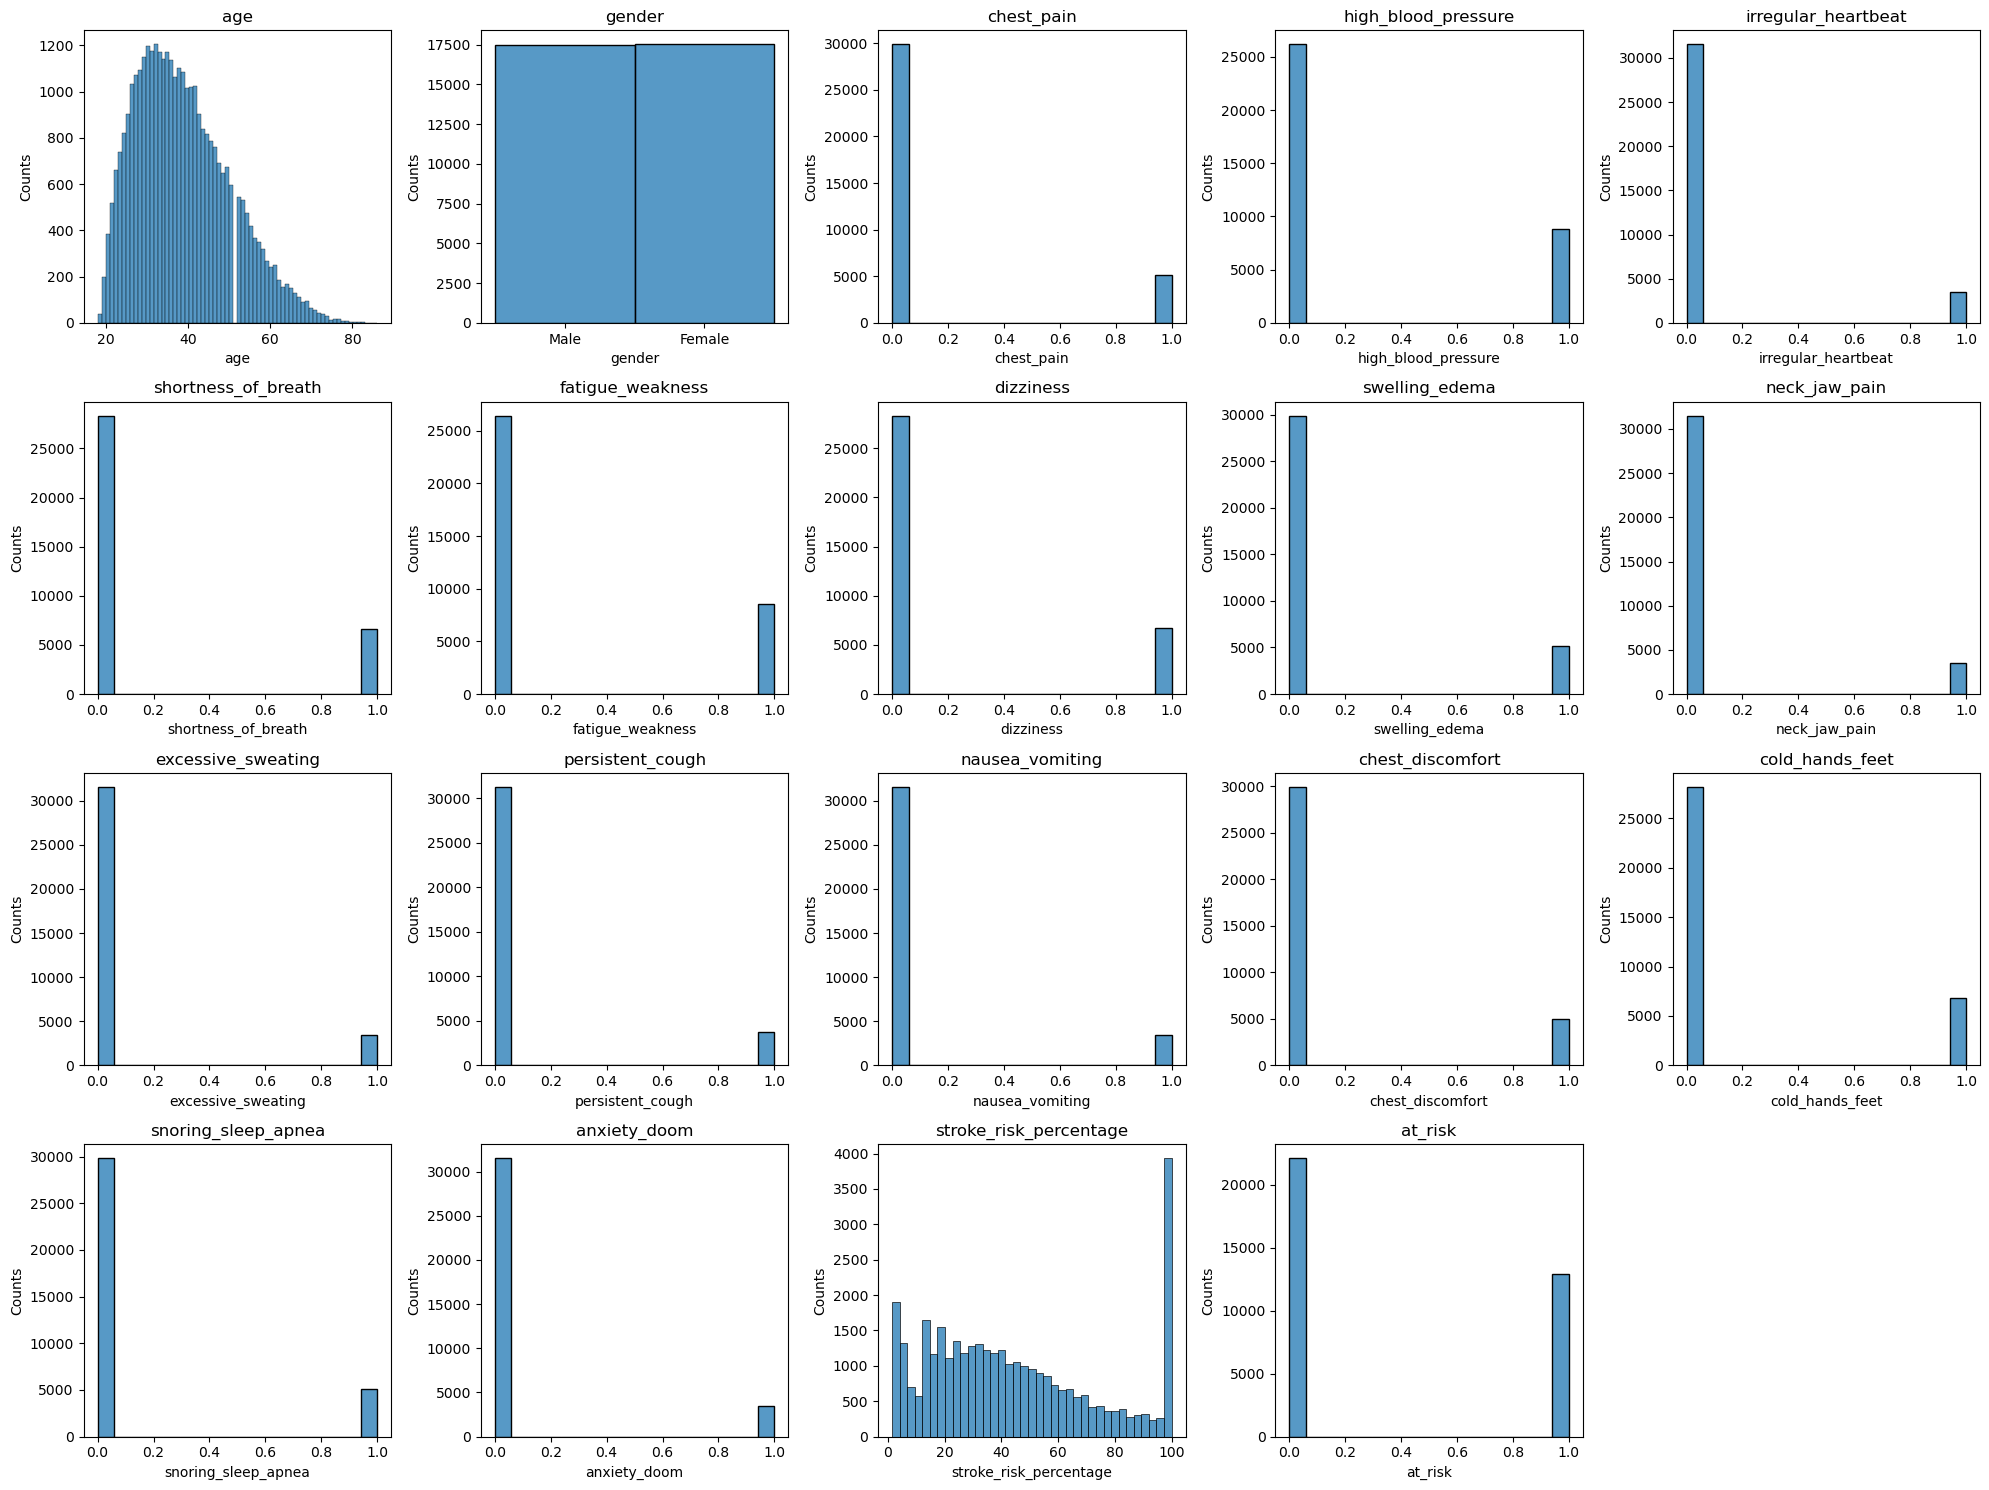

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15)) 
axes = axes.flatten() 
i=0
for col in df.columns:
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')
    i += 1

for idx in range(i, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()   

## 3. Visualize relationships between features

### 3.1 Correlation Matrix and Heatmap

In [25]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df.drop(columns='gender').corr()
threshold = 0.5

# Style the filtered correlation matrix
styled_corr_matrix = corr_matrix.style.applymap(
    lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_49032\2699986048.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_corr_matrix = corr_matrix.style.applymap(


,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
age,1.000000,0.168223,0.244225,0.181611,0.150456,0.146154,0.151959,0.162521,0.180681,0.106158,0.146411,0.105473,0.166028,0.153875,0.184841,0.106353,0.821830,0.664524
chest_pain,0.168223,1.000000,0.053512,0.038683,0.032342,0.020078,0.035349,0.028422,0.036229,0.016969,0.030248,0.011744,0.034618,0.030409,0.039338,0.025241,0.333149,0.295271
high_blood_pressure,0.244225,0.053512,1.000000,0.068019,0.059428,0.044233,0.045524,0.061187,0.059491,0.026005,0.048891,0.019069,0.053906,0.051284,0.059304,0.028740,0.446548,0.393487
irregular_heartbeat,0.181611,0.038683,0.068019,1.000000,0.032280,0.036436,0.032442,0.042940,0.032700,0.017122,0.030478,0.021290,0.031313,0.029435,0.050128,0.025554,0.276355,0.239826
shortness_of_breath,0.150456,0.032342,0.059428,0.032280,1.000000,0.032411,0.032544,0.026028,0.038200,0.028557,0.029829,0.018689,0.034378,0.039313,0.031783,0.024065,0.302408,0.258746
fatigue_weakness,0.146154,0.020078,0.044233,0.036436,0.032411,1.000000,0.018092,0.028219,0.028703,0.019131,0.039519,0.026243,0.030211,0.027146,0.024416,0.019754,0.247490,0.202815
dizziness,0.151959,0.035349,0.045524,0.032442,0.032544,0.018092,1.000000,0.029042,0.029603,0.013776,0.029949,0.013237,0.024143,0.021391,0.043399,0.011792,0.245159,0.200802
swelling_edema,0.162521,0.028422,0.061187,0.042940,0.026028,0.028219,0.029042,1.000000,0.041276,0.021523,0.017536,0.022844,0.028513,0.031917,0.055679,0.018910,0.241422,0.198199
neck_jaw_pain,0.180681,0.036229,0.059491,0.032700,0.038200,0.028703,0.029603,0.041276,1.000000,0.022958,0.015474,0.029035,0.031894,0.026595,0.037376,0.013378,0.233390,0.186125
excessive_sweating,0.106158,0.016969,0.026005,0.017122,0.028557,0.019131,0.013776,0.021523,0.022958,1.000000,0.016684,0.014311,0.015457,0.025528,0.021481,0.010235,0.130978,0.107098


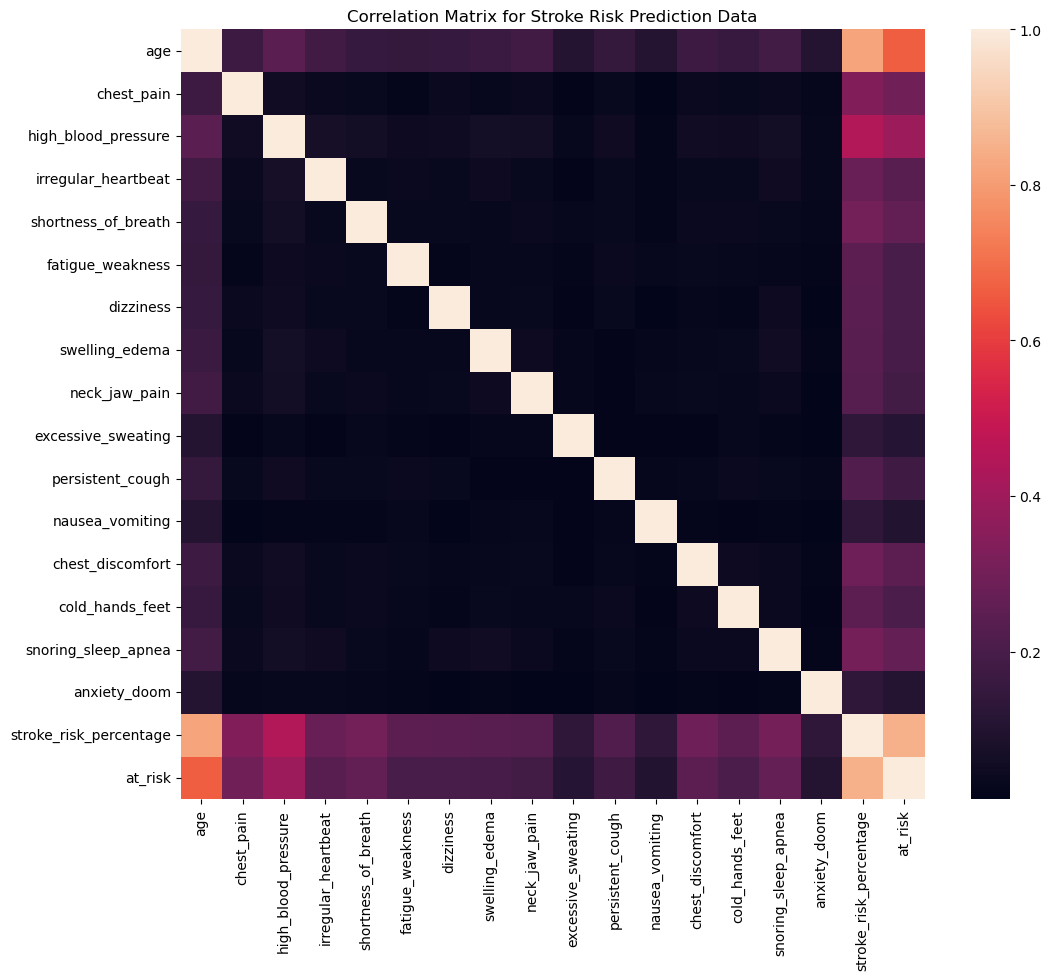

In [26]:
# Make a heatmap of the filtered maxtrix
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix for Stroke Risk Prediction Data')
plt.savefig('Correlation Matrix for Strole Risk Prediction Data.jpg')
plt.show()

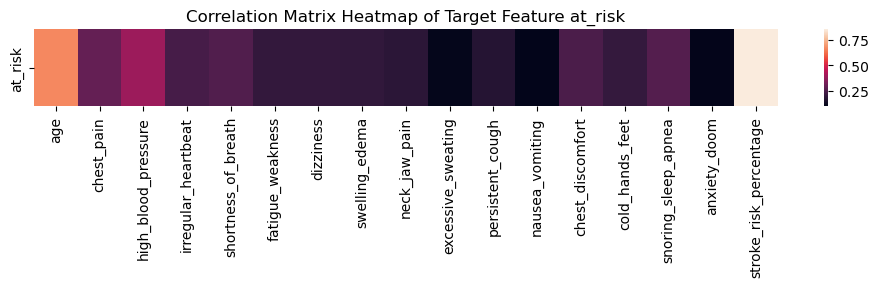

In [ ]:
# Make Correlation Matrix Heatmap of Features and at_risk
corr_matrix_at_risk = corr_matrix.loc[['at_risk'], abs(corr_matrix['at_risk']) < 1 ]
plt.subplots(figsize=(12, 1))
sns.heatmap(corr_matrix_at_risk)
plt.title('Correlation Matrix Heatmap of Target Feature at_risk')
plt.savefig('Correlation Matrix Heatmap of Target Feature at_risk.jpg')
plt.show()

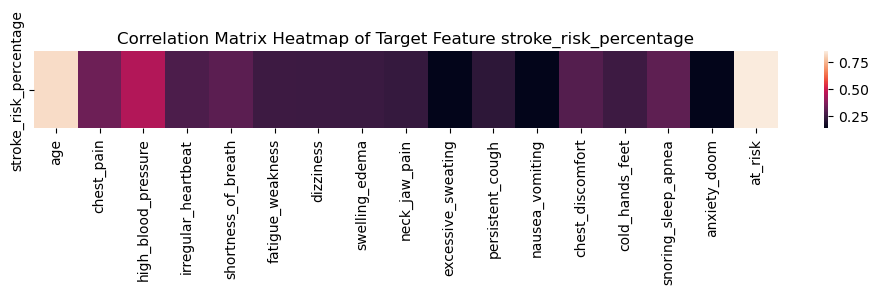

In [57]:
# Make Correlation Matrix Heatmap of Features and stroke_risk_percentage
corr_matrix_risk_pct = corr_matrix.loc[['stroke_risk_percentage'], abs(corr_matrix['stroke_risk_percentage']) < 1 ]
plt.subplots(figsize=(12, 1))
sns.heatmap(corr_matrix_at_risk)
plt.title('Correlation Matrix Heatmap of Target Feature stroke_risk_percentage')
plt.savefig('Correlation Matrix Heatmap of Target Feature stroke_risk_percentage.jpg')
plt.show()

In [59]:
corr_matrix_risk_pct.T.abs().sort_values(by='stroke_risk_percentage', ascending=False).head(6)


,stroke_risk_percentage
at_risk,0.852185
age,0.821830
high_blood_pressure,0.446548
chest_pain,0.333149
snoring_sleep_apnea,0.306356
shortness_of_breath,0.302408


### 3.2 Correlation of each independant feature with target feature

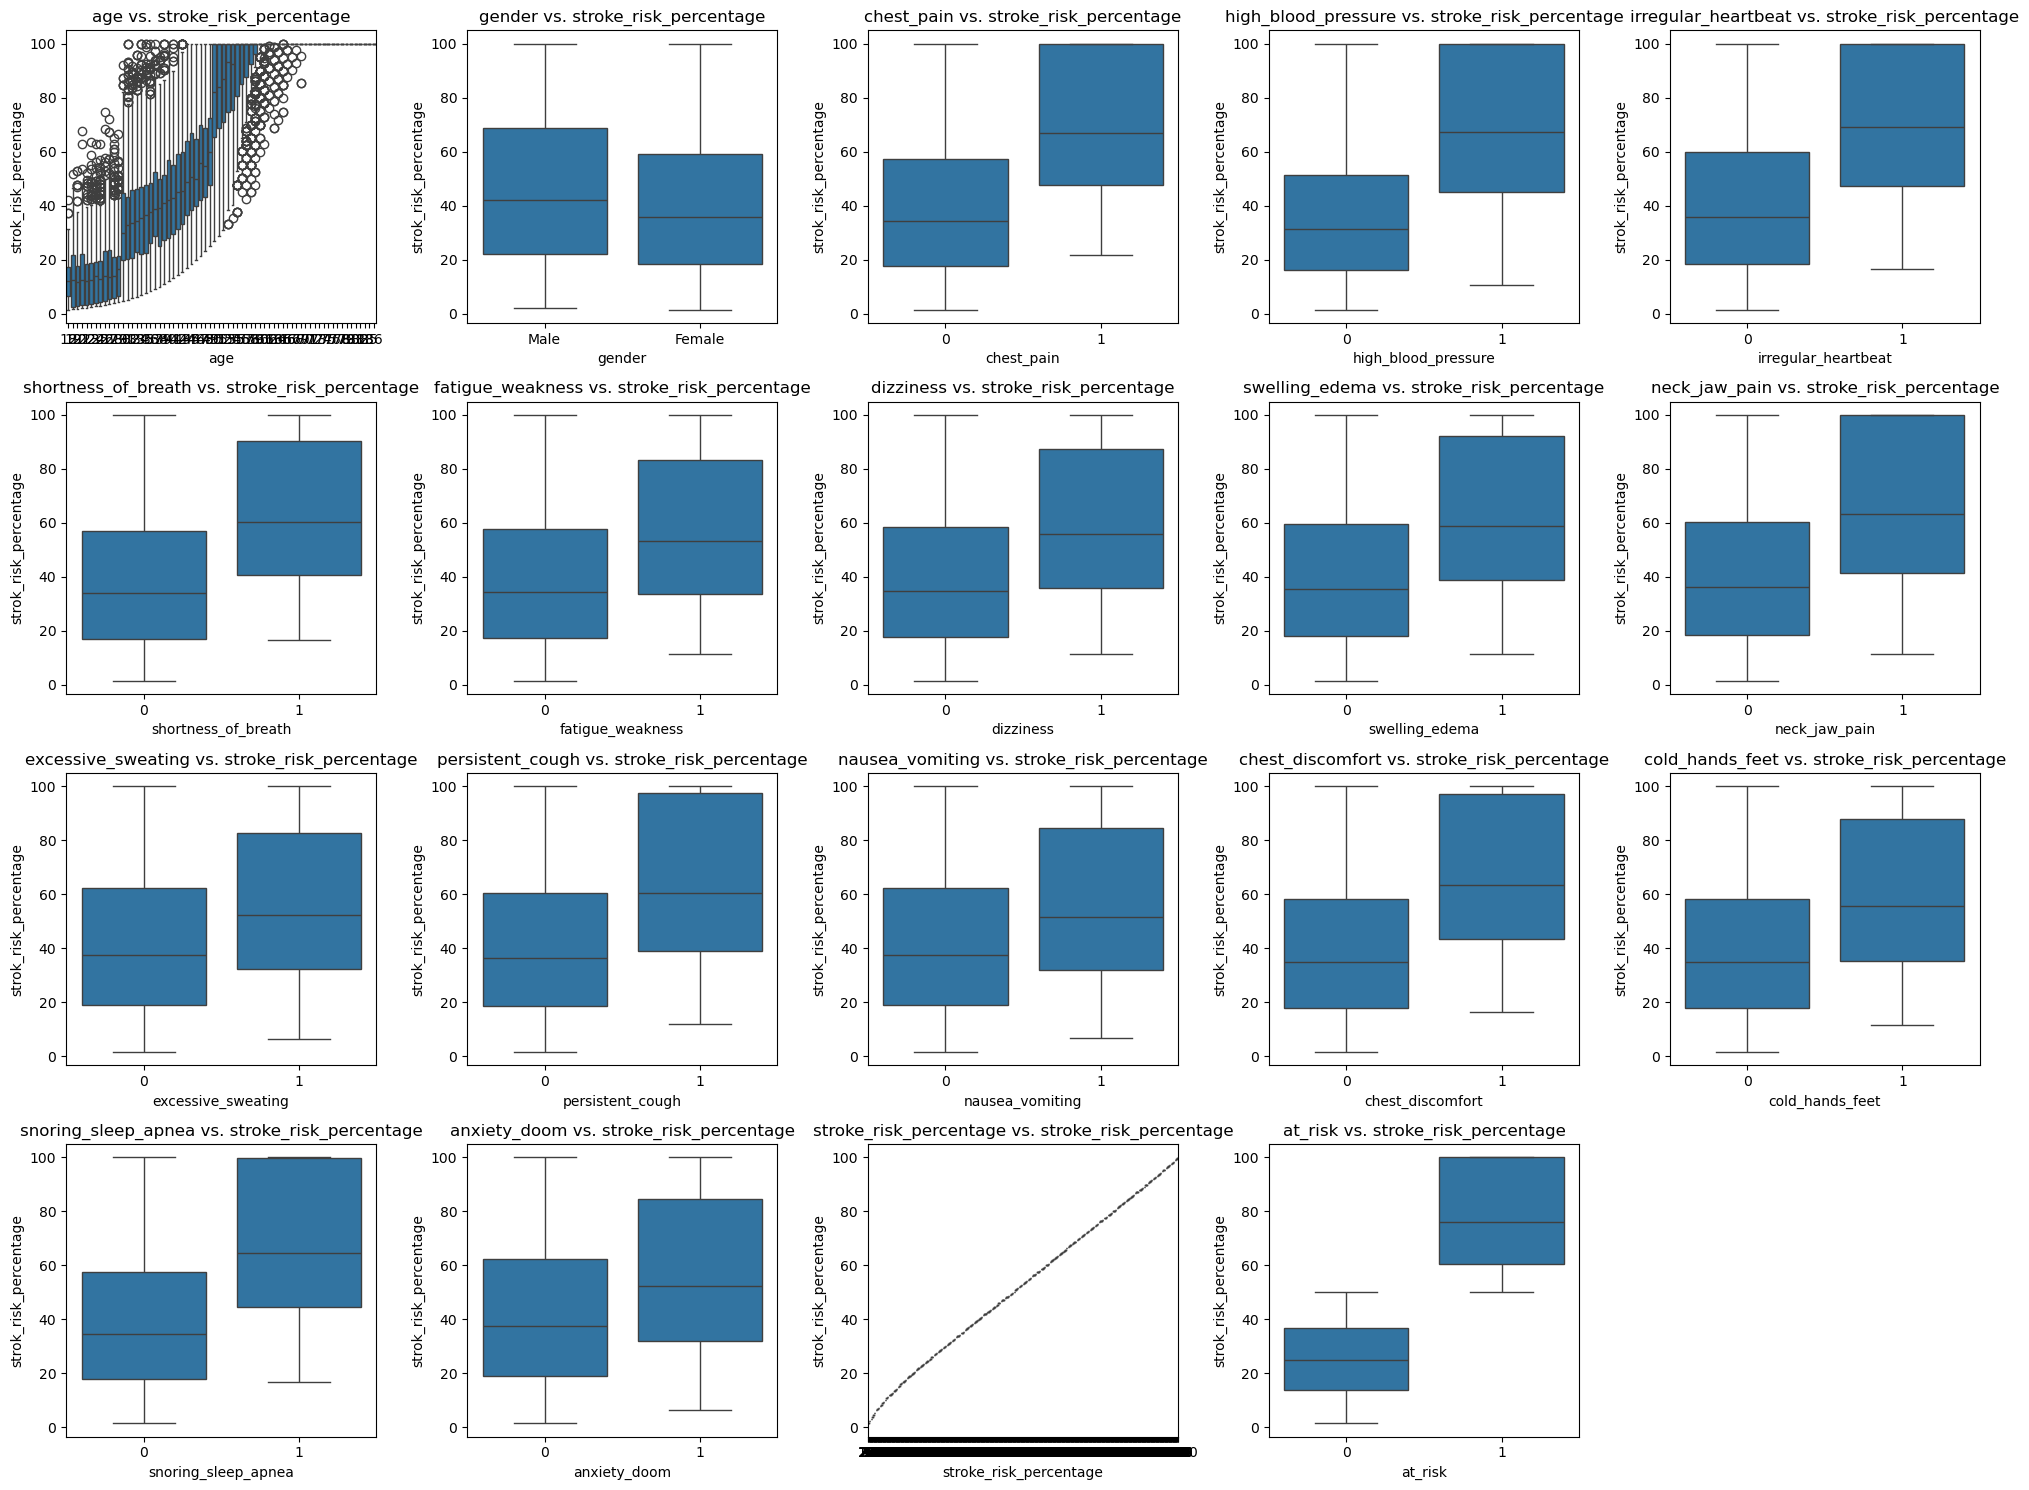

In [31]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15)) 
axes = axes.flatten() 
i=0
for col in df.columns:
    sns.boxplot(x=df[col], y=df['stroke_risk_percentage'], ax=axes[i])
    axes[i].set_title(f'{col} vs. stroke_risk_percentage')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('strok_risk_percentage')
    i += 1

for idx in range(i, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()   

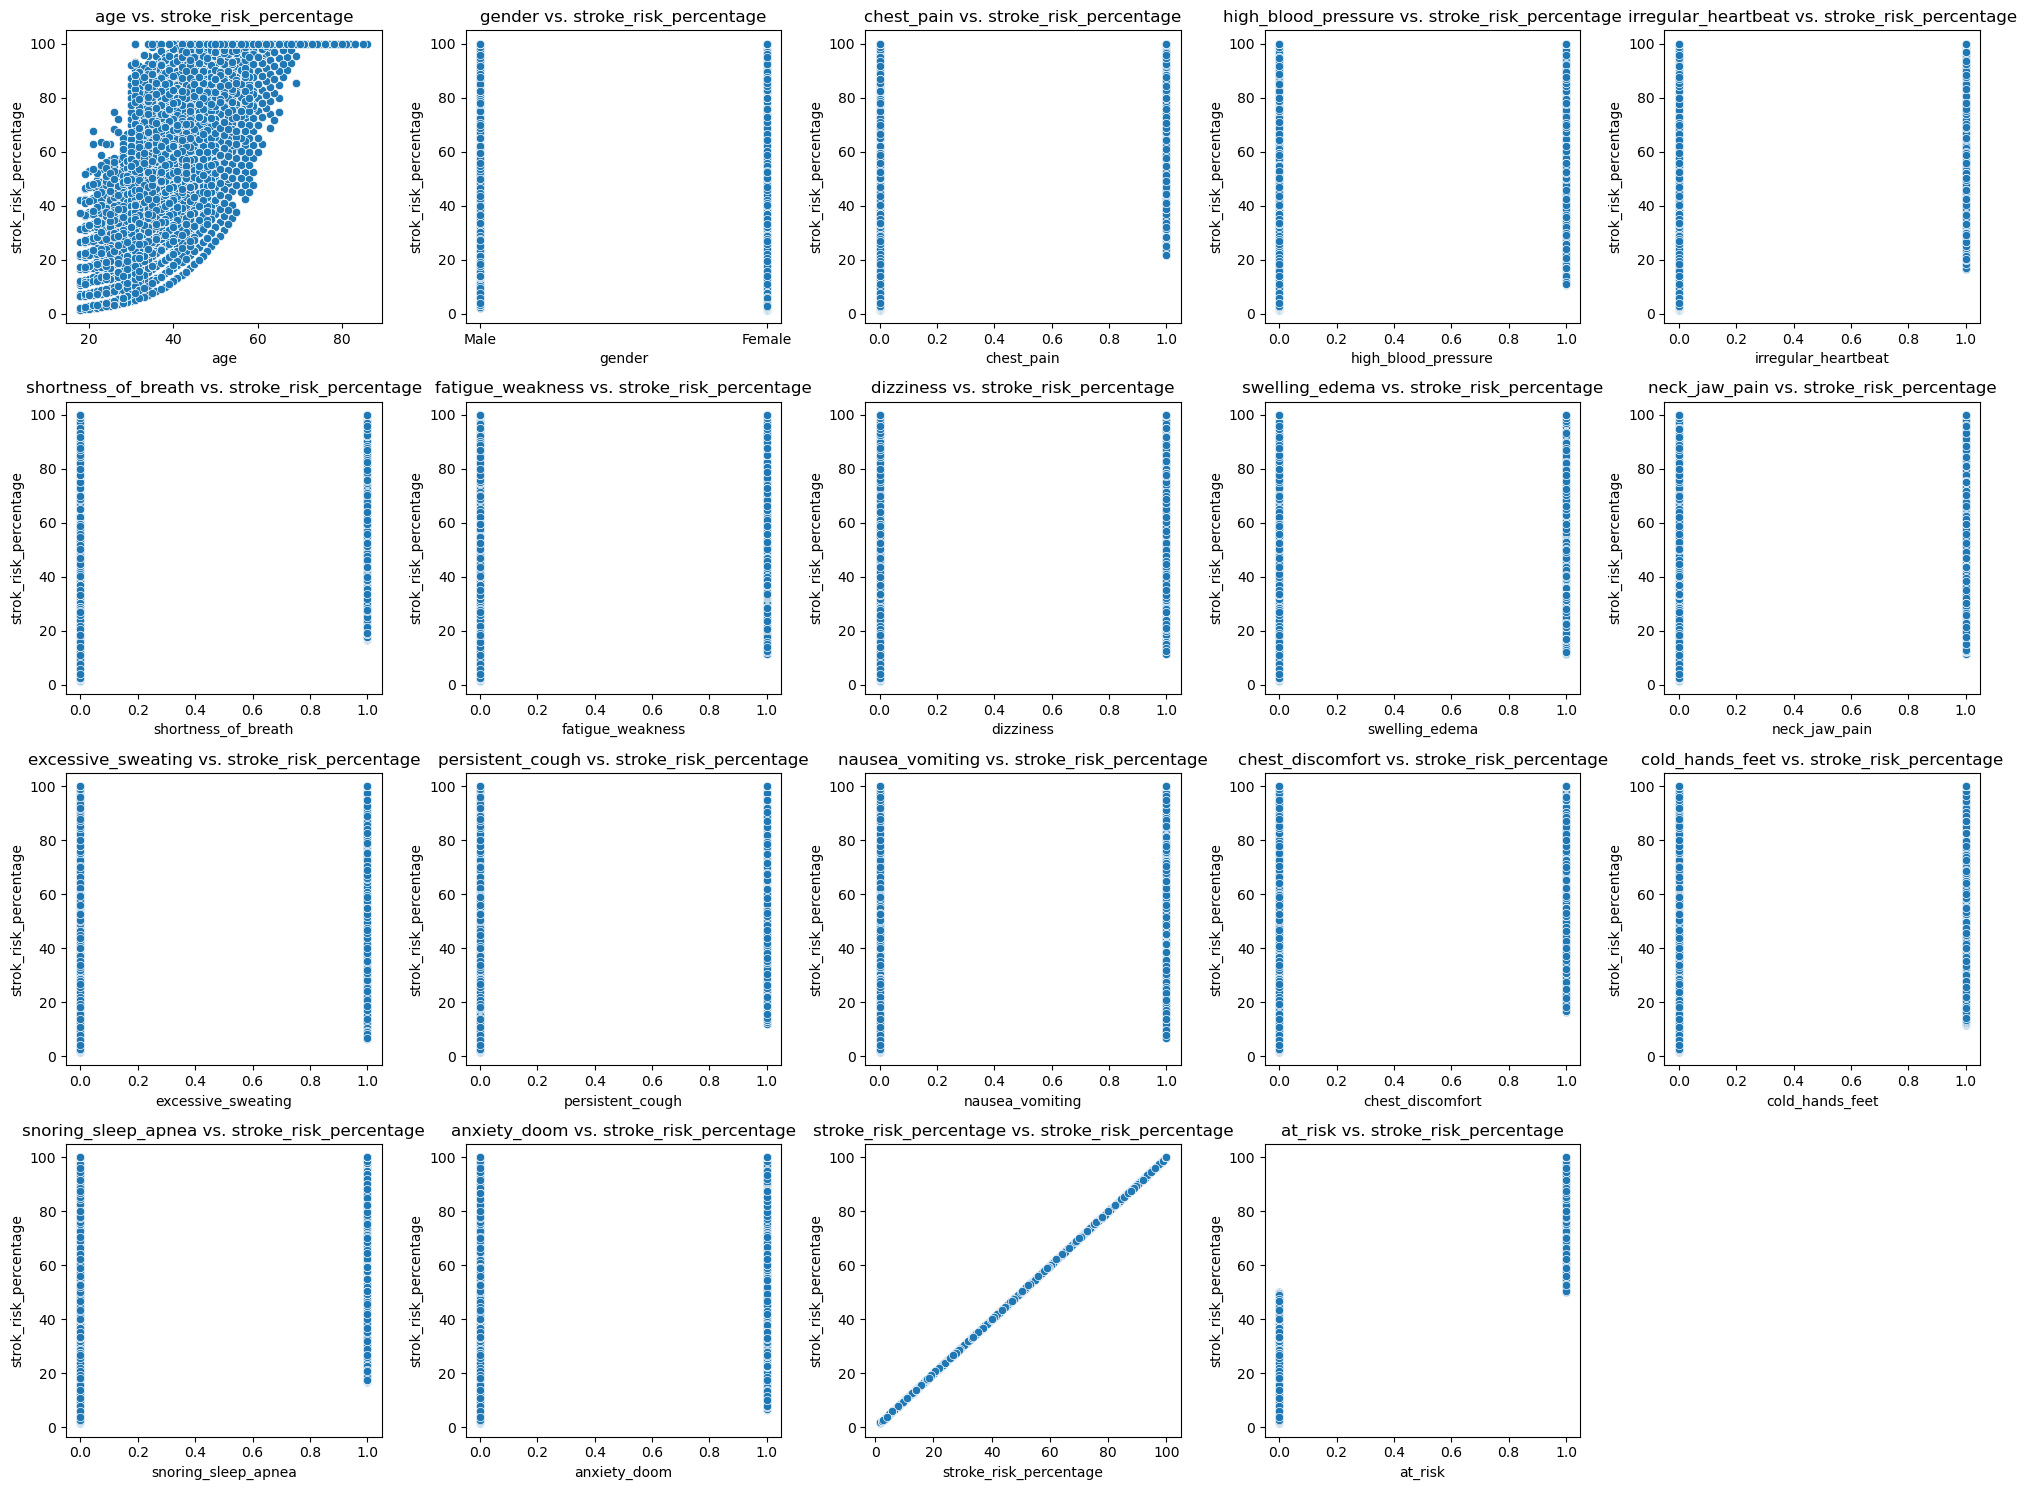

In [32]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15)) 
axes = axes.flatten() 
i=0
for col in df.columns:
    sns.scatterplot(x=df[col], y=df['stroke_risk_percentage'], ax=axes[i])
    axes[i].set_title(f'{col} vs. stroke_risk_percentage')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('strok_risk_percentage')
    i += 1

for idx in range(i, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()   

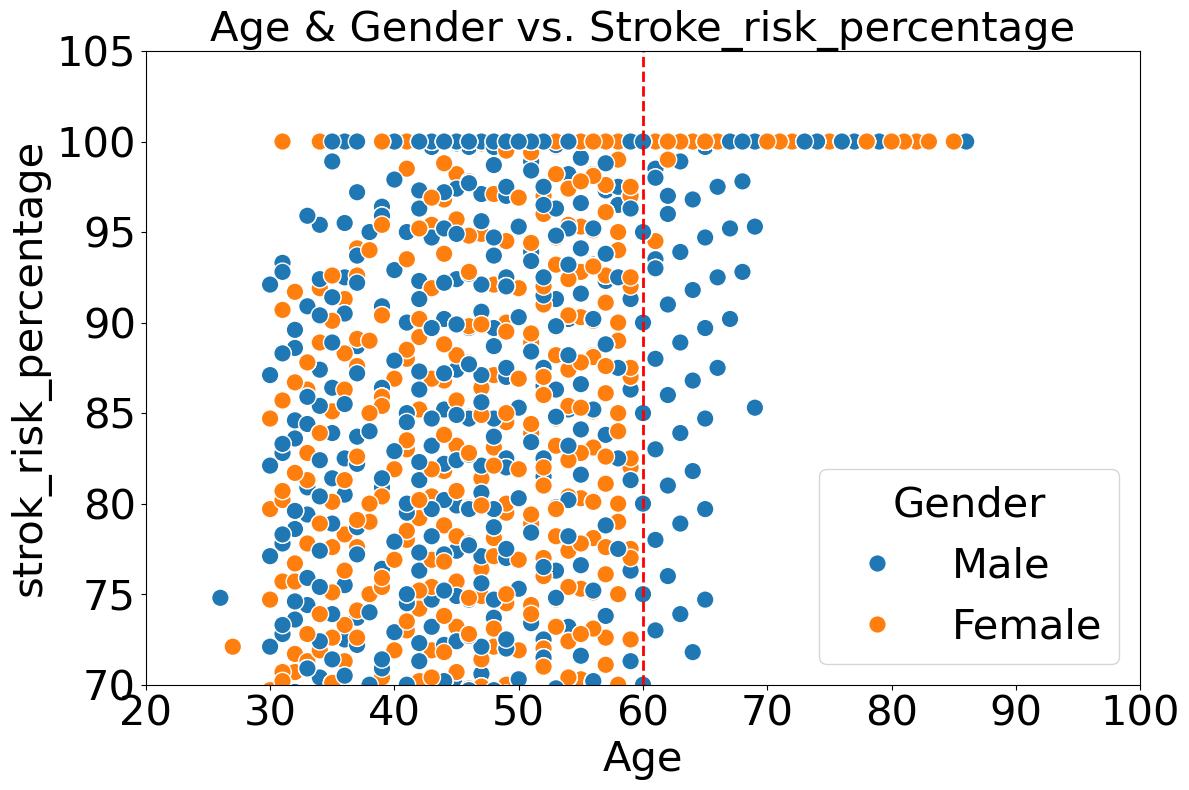

In [49]:
plt.subplots(figsize=(12, 8)) 

sns.scatterplot(x=df['age'], y=df['stroke_risk_percentage'], hue=df['gender'], s=160)
plt.ylim(70, 105)
plt.xlim(20,100)

plt.title('Age & Gender vs. Stroke_risk_percentage', fontsize=30)
plt.xlabel('Age', fontsize=30)
plt.ylabel('strok_risk_percentage', fontsize=30)
plt.legend(title='Gender', fontsize=30, title_fontsize=30, loc='lower right', bbox_to_anchor=(1,0))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(x=60, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()   

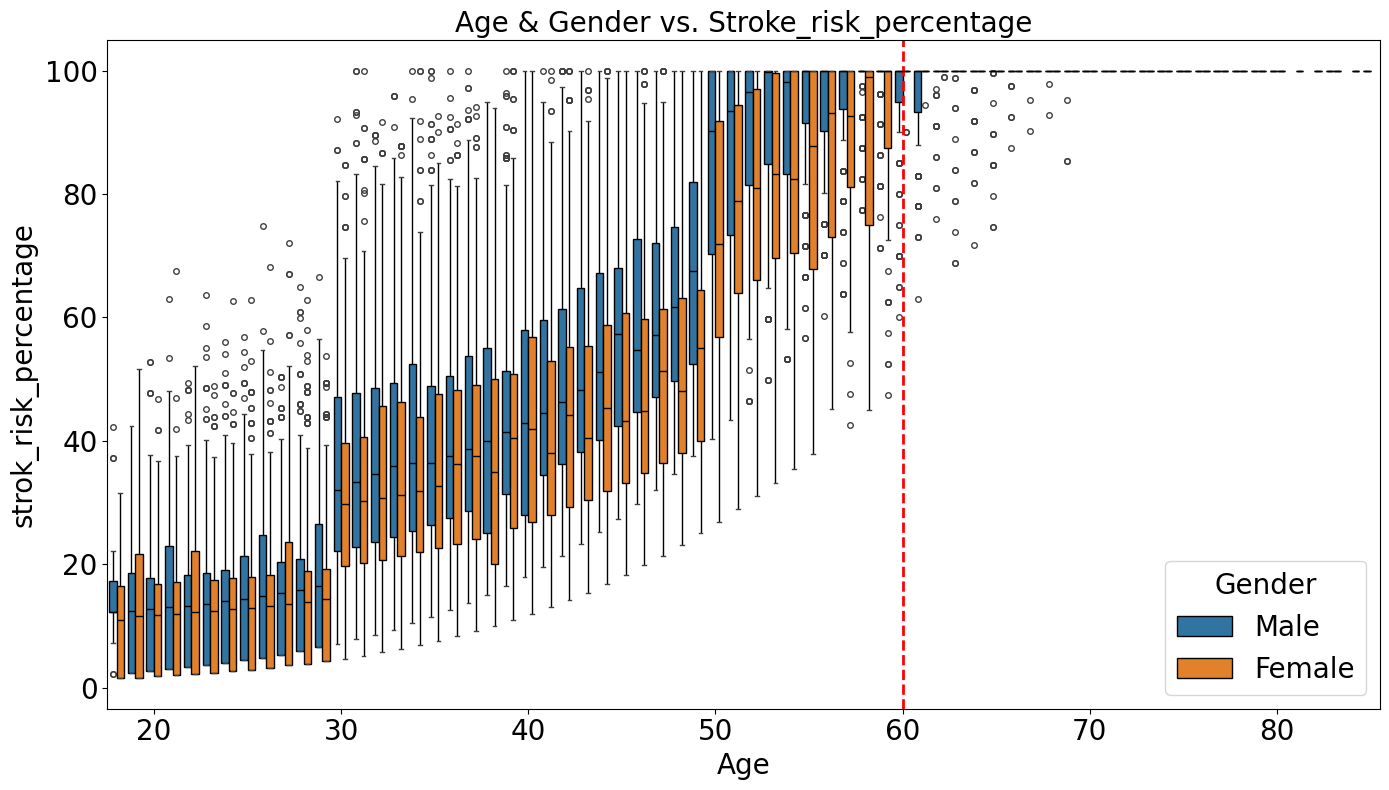

In [56]:
plt.subplots(figsize=(14, 8)) 

sns.boxplot(x=df['age'], 
            y=df['stroke_risk_percentage'], 
            hue=df['gender'],
            showcaps=True,
            boxprops=dict(edgecolor='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(marker='o', markersize=4, linestyle='none'),
            medianprops=dict(color='black')
            )
# Format x-ticks: show only every 10 years
ages = sorted(df['age'].unique())
selected_ticks = [age for age in ages if age % 10 == 0]
plt.xticks(
    ticks=[ages.index(age) for age in selected_ticks],
    labels=selected_ticks,
    rotation=0,
    fontsize=12
)

plt.title('Age & Gender vs. Stroke_risk_percentage', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('strok_risk_percentage', fontsize=20)
plt.legend(title='Gender', fontsize=20, title_fontsize=20, loc='lower right', bbox_to_anchor=(1,0))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(x=ages.index(60), color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()   